<a href="https://colab.research.google.com/github/hufsaim/T10402201/blob/master/notebook/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultiLayer Perceptron

- Linear regression model을 MLP model로 바꾸어 학습을 진행하고, 학습데이터에 대한 결과를 비교해보자.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
d = pd.read_excel('data0327.xlsx')
X = torch.tensor(d.iloc[:,:-1].to_numpy()).to(torch.float32) # input
y = torch.tensor(d.iloc[:,-1].to_numpy()).to(torch.float32) # label
X_vd = X.clone() # 실제 학습에서는 X에 포함되지 않는 새로운 데이터를 넣자.
y_vd = y.clone()
print(X.shape)

torch.Size([33, 4])


In [3]:
# data loader
def data_iter(data, label, batch_size):
  N,num_features = data.shape
  inds = list(range(N))
  random.shuffle(inds)
  for i in range(0,N,batch_size):
    batch_inds = inds[i:min(i+batch_size, N)]
    batch_data = data[batch_inds,:]
    batch_label = label[batch_inds]
    yield batch_data, batch_label

## Linear Regression

In [4]:
num_epoch = 50000
lr = 0.00042
batch_size = len(X)

model1 = nn.Linear(4,1)
loss = nn.MSELoss(reduction="mean")
alg = torch.optim.SGD(model1.parameters(),lr)

loss_valid_epoch = []
loss_valid_step = []
# loop for learning
for j in np.arange(0,num_epoch):
  mydata_iter = data_iter(X,y,batch_size)
  for batch_X,batch_y in mydata_iter:
    y_hat = model1(batch_X)         # 1. forward
    l = loss(y_hat, batch_y.reshape(y_hat.shape))    # 2. loss calculation
    l.backward()                  # 3. backward
    alg.step()                  # 4. parameter update
    alg.zero_grad()               
    loss_valid_step.append(l.detach())

  y_vd_hat = model1(X_vd)
  l_all = loss(y_vd_hat,y_vd.reshape(y_vd_hat.shape))
  loss_valid_epoch.append(l_all.detach())

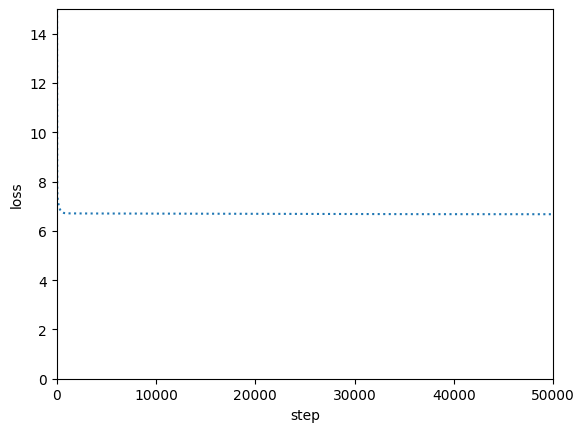

In [5]:
plt.plot(loss_valid_epoch,':')
plt.xlabel('step')
plt.ylabel('loss')
plt.axis([0,num_epoch,0,15])
plt.show()

- 충분한 epoch을 실행하였으나, loss는 6이하로 떨어지지 않음.

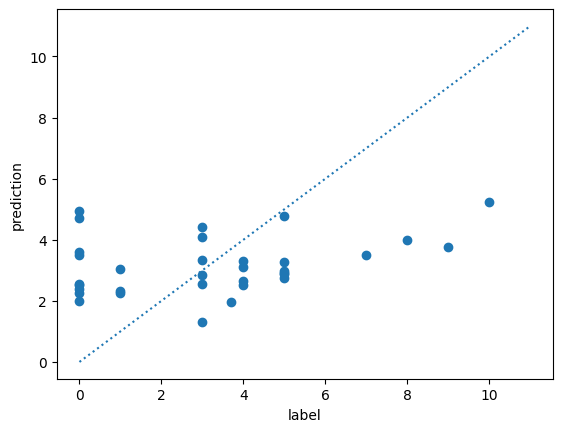

In [6]:
plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()

## MultiLayer Percetron (MLP)

### nonlinear activation없이 충분한(?) 수의 node를 가진 hidden layer를 추가해 보자.

In [7]:
num_epoch = 50000
lr = 0.00042
batch_size = len(X)

# non-linear activation을 포함하지 않은 MLP model
model2 = nn.Sequential(
    nn.Linear(4,400),
    #nn.ReLU(),
    nn.Linear(400,1)
)
loss = nn.MSELoss(reduction="mean")
alg = torch.optim.SGD(model2.parameters(),lr)

loss_valid_epoch = []
loss_valid_step = []
# loop for learning
for j in np.arange(0,num_epoch):
  mydata_iter = data_iter(X,y,batch_size)
  for batch_X,batch_y in mydata_iter:
    y_hat = model2(batch_X)         # 1. forward
    l = loss(y_hat, batch_y.reshape(y_hat.shape))    # 2. loss calculation
    l.backward()                  # 3. backward
    alg.step()                  # 4. parameter update
    alg.zero_grad()               
    loss_valid_step.append(l.detach())

  y_vd_hat = model2(X_vd)
  l_all = loss(y_vd_hat,y_vd.reshape(y_vd_hat.shape))
  loss_valid_epoch.append(l_all.detach())

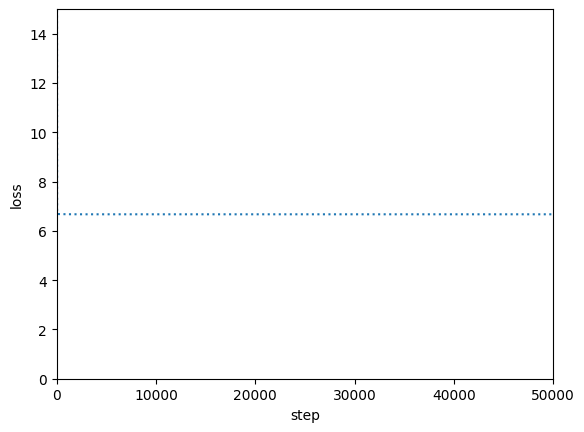

In [8]:
plt.plot(loss_valid_epoch,':')
plt.xlabel('step')
plt.ylabel('loss')
plt.axis([0,num_epoch,0,15])
plt.show()

- Linear regression model의 결과와 큰 차이가 없음. Loss는 6 이하로 떨어지지 않고 있음.

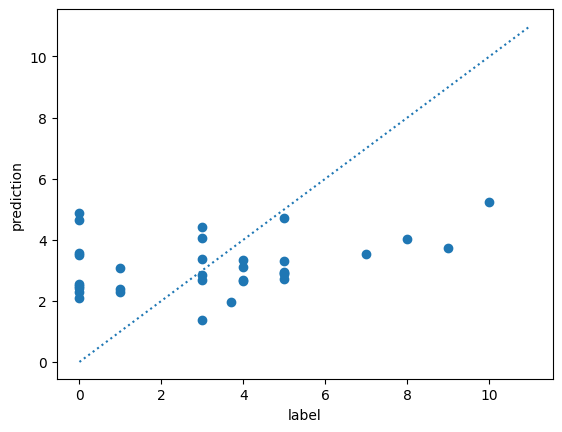

In [9]:
plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()

### nonlinear activation을 포함하여 반복해보자.

In [10]:
num_epoch = 50000
lr = 0.00042
batch_size = len(X)

# nonlinear activation을 포함하는 MLP model
model2 = nn.Sequential(
    nn.Linear(4,400),
    nn.ReLU(),
    nn.Linear(400,1)
)
loss = nn.MSELoss(reduction="mean")
alg = torch.optim.SGD(model2.parameters(),lr)

loss_valid_epoch = []
loss_valid_step = []
# loop for learning
for j in np.arange(0,num_epoch):
  mydata_iter = data_iter(X,y,batch_size)
  for batch_X,batch_y in mydata_iter:
    y_hat = model2(batch_X)         # 1. forward
    l = loss(y_hat, batch_y.reshape(y_hat.shape))    # 2. loss calculation
    l.backward()                  # 3. backward
    alg.step()                  # 4. parameter update
    alg.zero_grad()               
    loss_valid_step.append(l.detach())

  y_vd_hat = model2(X_vd)
  l_all = loss(y_vd_hat,y_vd.reshape(y_vd_hat.shape))
  loss_valid_epoch.append(l_all.detach())

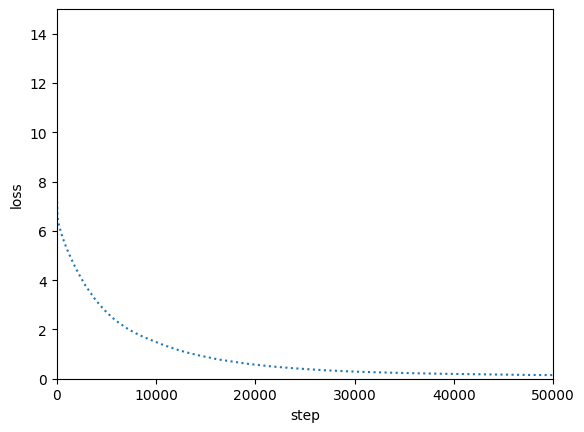

In [11]:
plt.plot(loss_valid_epoch,':')
plt.xlabel('step')
plt.ylabel('loss')
plt.axis([0,num_epoch,0,15])
plt.show()

- 동일한 MLP에 ReLU를 추가하는 경우, Loss가 0에 가까워지고 있으며 대부분의 데이터에 대해서 label과 거의 비슷한 prediction을 보여줌. 
- 이는 실제 입력과 출력 사이 그럴듯한 관계가 별로 없는 데이터에 대해서도 nonlinear activation을 포함하는 MLP model이 둘 사이의 관계를 잘 표현하는 것을 나타냄.


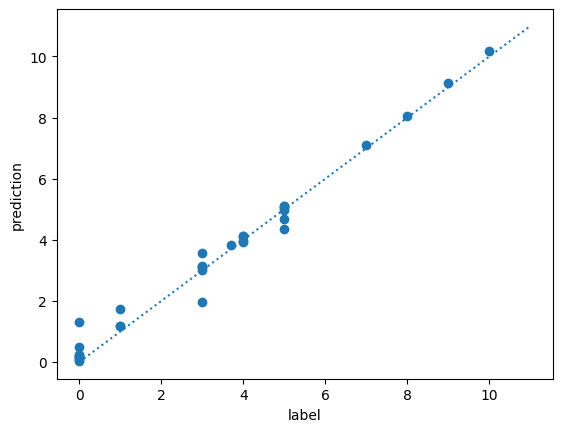

In [12]:
plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()